In [ ]:

!pip install opencv-python

!pip install tensorflow==1.13.1
!pip install keras==2.2.4
!pip install h5py==2.10.0
!pip install pandas
!pip install seaborn
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Rationale PIMA

Pima Indian Diabetes Dataset, originally from the National Institute of Diabetes and Digestive and Kidney Diseases, contains information of 768 women from a population near Phoenix, Arizona, USA. The outcome tested was Diabetes onset.

# Reference
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4418458/

# I. Data Dictionary and description of attributes of the PIMA dataset
# II. Prediction Task
# To predict the onset of diabetes based on diagnostic measures.

In [ ]:
########## PIMA DATASET DESCRIPTION ###############
# This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.
# The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on measurements 
# collected for diagnostic purposes.

#I. Data Dictionary and description of attributes of the PIMA dataset

# 1. Pregnancies - Number of times pregnant

# 2. Glucose - Plasma glucose concentration - 2 hours in an oral glucose tolerance test

# 3. BloodPressure - Diastolic blood pressure (mm Hg)

# 4. SkinThickness - Triceps skin fold thickness (mm)

# 5. Insulin - 2-Hour serum insulin (mu U/ml)

# 6. BMI - Body mass index

# 7. DiabetesPedigreeFunction - Diabetes pedigree function

# 8. Age - Age (years)

# 9. Outcome - Class variable (0 or 1)


######### PIMA DATASET DESCRIPTION ###############


In [1]:
# Create your MLP for pima-indian-diabetes dataset in Keras
# Create your first MLP in Keras
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
import numpy as np

# initialising and mounting colab
from google.colab import drive
drive.mount('/content/gdrive')


# fix random seed for reproducibility
np.random.seed(9)
# load pima indians dataset
dataset = np.loadtxt("/content/gdrive/MyDrive/Colab Notebooks/pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

print(X.shape, Y.shape)
import pandas as pd
columns = ['preg', 'Glucose', 'BP', 'ST', 'Insulin', 'BMI', 'DPF', 'Age', 'Outcome']
df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/pima-indians-diabetes.csv", header=None,
                       names=columns)
print(df.shape)
print(df.head(5))

print(df.dtypes)

print(df.Outcome.unique())


dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

##################################################
# Find missing values #

print(df.isnull().sum())


Mounted at /content/gdrive
(768, 8) (768,)
(768, 9)
   preg  Glucose  BP  ST  Insulin   BMI    DPF  Age  Outcome
0     6      148  72  35        0  33.6  0.627   50        1
1     1       85  66  29        0  26.6  0.351   31        0
2     8      183  64   0        0  23.3  0.672   32        1
3     1       89  66  23       94  28.1  0.167   21        0
4     0      137  40  35      168  43.1  2.288   33        1
preg         int64
Glucose      int64
BP           int64
ST           int64
Insulin      int64
BMI        float64
DPF        float64
Age          int64
Outcome      int64
dtype: object
[1 0]
preg       0
Glucose    0
BP         0
ST         0
Insulin    0
BMI        0
DPF        0
Age        0
Outcome    0
dtype: int64


0    500
1    268
Name: Outcome, dtype: int64


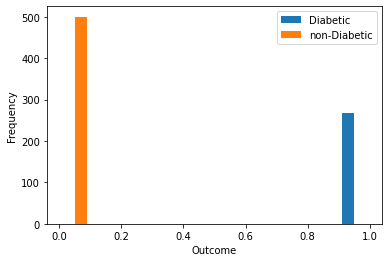

,preg,Glucose,BP,ST,Insulin,BMI,DPF,Age,Outcome
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BP,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
ST,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DPF,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


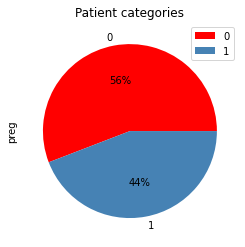

In [6]:

import matplotlib.pyplot as plt
import seaborn as sns
######### Exploratory visualisation ###################################
print(df.Outcome.value_counts())
plt.hist([
    df.Outcome[df.Outcome == 1],
    df.Outcome[df.Outcome == 0],
], label=['Diabetic', 'non-Diabetic'])
plt.ylabel('Frequency')
plt.xlabel('Outcome')
plt.legend()
plt.show()

############ PIE CHART ####################################################
df.groupby(['Outcome']).sum().plot(kind='pie', y='preg', autopct='%1.0f%%',
                                colors = ['red','steelblue'],
                                title='Patient categories')

#2. ######################################################################

df_corr = df.corr().transpose()
df_corr

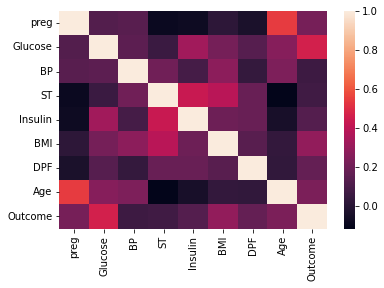

In [ ]:
cor = df.corr(method ='pearson')
sns.heatmap(cor)

['0', '1']


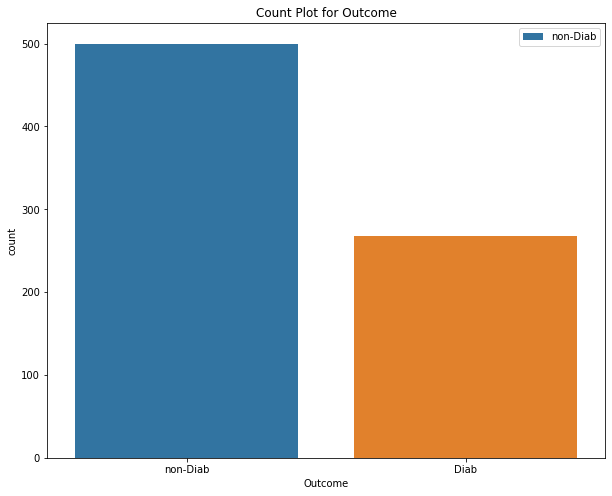

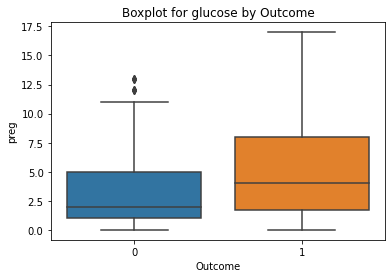

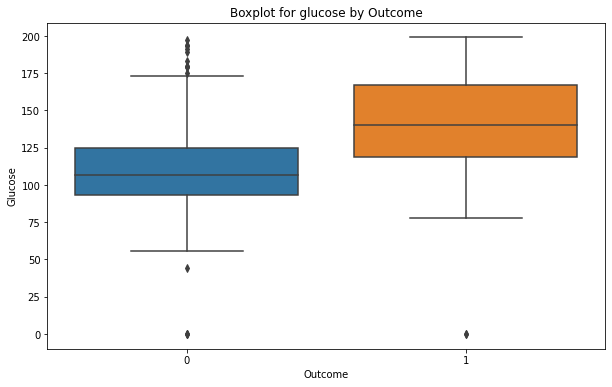

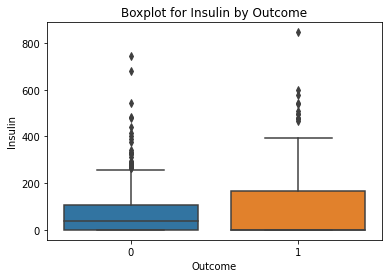

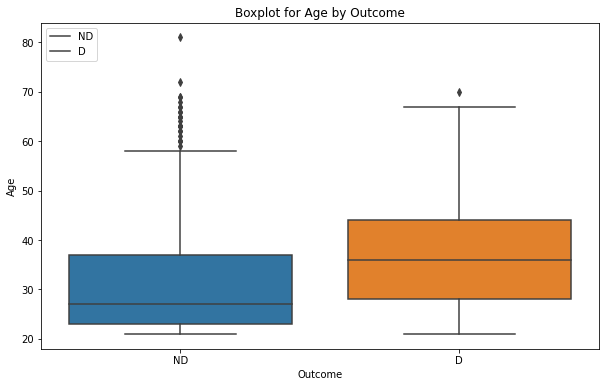

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(x=df.Outcome, label=['non-Diab', 'Diab'])
plt.title("Count Plot for Outcome")
labels = [item.get_text() for item in ax.get_xticklabels()]
#print(labels)
labels[0] = 'non-Diab'
labels[1] = 'Diab'
ax.set_xticklabels(labels)
ax.legend(['non-Diab', 'Diab'], loc=1)
#plt.legend(loc='upper right')
plt.show()

## Feature 1 'Preg' #########
sns.boxplot(x=df.Outcome, y=df.preg)
plt.title("Boxplot for glucose by Outcome")
#plt.legend()
plt.show()

### visualisation of Feature 2 and Glucose plot by category of the patient
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(x=df.Outcome, y=df.Glucose)
plt.title("Boxplot for glucose by Outcome")
#plt.legend()
plt.show()

### visualisation of Insulin Feature and Insulin plot by category of the patient
sns.boxplot(x=df.Outcome, y=df.Insulin)
plt.title("Boxplot for Insulin by Outcome")
#plt.legend()
plt.show()

### visualisation of Age Feature and Age plot by category of the patient
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(x=df.Outcome, y=df.Age)
plt.title("Boxplot for Age by Outcome")
#plt.legend()
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'ND'
labels[1] = 'D'
ax.set_xticklabels(labels)
ax.legend(labels, loc=2)
plt.show()






/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


34.895833333333336 65.10416666666667
(268, 9)
(500, 9)


Text(0.5, 1.0, 'Boxplot for BMI by Outcome')

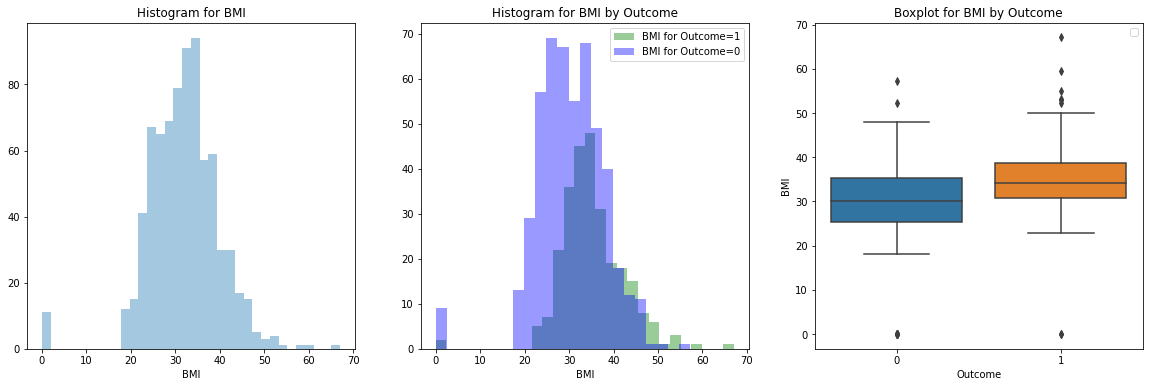

In [ ]:
############## BMI Measurement variable ############
# Computing the percentage of diabetic and non-diabetic in the given dataset
Out_D = len(df[df.Outcome==1])
Out_ND = len(df[df.Outcome==0])
Total = Out_D+Out_ND
PC_of_D = Out_D*100/Total
PC_of_ND = Out_ND*100/Total

print(PC_of_D, PC_of_ND)

############################################################################
#subset of the dataframe values belonging to Diabetes category of patients
df_D = df[df.Outcome==1]

print(df_D.shape)

#subset of the dataframe values belonging to non-Diabetes category

df_ND = df[df.Outcome==0]

print(df_ND.shape)


plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.distplot(df.BMI, kde=False)
plt.title("Histogram for BMI")
plt.subplot(1,3,2)
sns.distplot(df_D.BMI, kde=False,color="Green", label="BMI for Outcome=1")
sns.distplot(df_ND.BMI, kde=False, color="Blue", label="BMI for Outcome=0")
plt.legend()
plt.title("Histogram for BMI by Outcome")
plt.subplot(1,3,3)
sns.boxplot(x=df.Outcome, y=df.BMI)
plt.legend()
plt.title("Boxplot for BMI by Outcome")


In [ ]:
# Basic logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
cols4=["preg", "Glucose","BP", "Insulin", "Age"]
X=df[cols4]
y=df.Outcome
logreg.fit(X,y)
## Defining the y_pred variable for the predicting values. I have taken 392 dia dataset. We can also take a test dataset
y_pred=logreg.predict(X)
## Calculating the precision of the model
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

from sklearn.metrics import confusion_matrix
## Confusion matrix gives the number of cases where the model is able to accurately predict the outcomes.. both 1 and 0 and how many cases it gives false positive and false negatives
confusion_matrix = confusion_matrix(y, y_pred)
print(confusion_matrix)


              precision    recall  f1-score   support

           0       0.77      0.88      0.82       500
           1       0.69      0.51      0.59       268

    accuracy                           0.75       768
   macro avg       0.73      0.70      0.71       768
weighted avg       0.74      0.75      0.74       768

[[439  61]
 [130 138]]


In [ ]:
# For 2D features we only use dense features
# Train all data without any testing and validation split specification
import h5py
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X, Y, epochs=100, batch_size=10)
# evaluate the model
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

model.save('/content/gdrive/MyDrive/Colab Notebooks/pima_categorical/baseline-pima_without_validation-split.hdf5')

Epoch 1/100
768/768 [==============================] - 0s 424us/sample - loss: 3.4921 - acc: 0.6576
Epoch 2/100
768/768 [==============================] - 0s 153us/sample - loss: 2.0241 - acc: 0.6211
Epoch 3/100
768/768 [==============================] - 0s 157us/sample - loss: 1.3732 - acc: 0.6263
Epoch 4/100
768/768 [==============================] - 0s 155us/sample - loss: 1.1271 - acc: 0.6393
Epoch 5/100
768/768 [==============================] - 0s 150us/sample - loss: 1.0601 - acc: 0.6510
Epoch 6/100
768/768 [==============================] - 0s 178us/sample - loss: 0.9089 - acc: 0.6289
Epoch 7/100
768/768 [==============================] - 0s 165us/sample - loss: 0.7995 - acc: 0.6589
Epoch 8/100
768/768 [==============================] - 0s 173us/sample - loss: 0.7620 - acc: 0.6641
Epoch 9/100
768/768 [==============================] - 0s 159us/sample - loss: 0.7496 - acc: 0.6641
Epoch 10/100
768/768 [==============================] - 0s 166us/sample - loss: 0.7019 - acc: 0.6719

In [ ]:

from sklearn.model_selection import train_test_split
import numpy
import tensorflow as tf
# fix random seed for reproducibility
seed = 9
numpy.random.seed(seed)
# split into 70% for train and 30% for test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
# # create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# # Fit the model # 375 train #162 valid # Total Number of data points (Train+valid = 537)
# model.fit(X_train, y_train, validation_split=0.3, epochs=100, batch_size=10)
# model.save('/content/gdrive/MyDrive/Colab Notebooks/pima_categorical/baseline-pima_with_validation-split.h5')
# print(model.evaluate(X_test, y_test))
# # evaluate the model # 231 test
model.load_weights('/content/gdrive/MyDrive/Colab Notebooks/pima_categorical/baseline-pima_with_validation-split.h5')
y_pred = model.predict_classes(X_test)
print(np.squeeze(y_pred).shape)
#print(y_test)

# ## Calculating the precision of the model
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
# print(np.max(y_class), np.min(y_class))
#print(len(np.argmax(yhat,axis=-1)))

from sklearn.metrics import confusion_matrix
## Confusion matrix gives the number of cases where the model is able to accurately predict the outcomes.
### both 1 and 0 and how many cases it gives false positive and false negatives
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)



(537, 8) (537,)
(231, 8) (231,)
(231,)
              precision    recall  f1-score   support

         0.0       0.76      0.80      0.78       150
         1.0       0.59      0.53      0.56        81

    accuracy                           0.71       231
   macro avg       0.67      0.67      0.67       231
weighted avg       0.70      0.71      0.70       231

[[120  30]
 [ 38  43]]
